# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [62]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# import data 
transactions_df = pd.read_csv("../data/bank_transactions.csv")
transactions_df

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0
...,...,...,...,...,...,...,...,...,...,...
999995,PAYMENT,13606.07,C768838592,114122.11,100516.04,M1593119373,0.00,0.00,0,0
999996,PAYMENT,9139.61,C1912748675,0.00,0.00,M842968564,0.00,0.00,0,0
999997,CASH_OUT,153650.41,C1494179549,50677.00,0.00,C1560012502,0.00,380368.36,0,0
999998,CASH_OUT,163810.52,C116856975,0.00,0.00,C1348490647,357850.15,521660.67,0,0


In [64]:
# TODO: view the shape of your data
transactions_df.shape

(1000000, 10)

### Q1 Visualizations: Distribution of Transaction Amounts

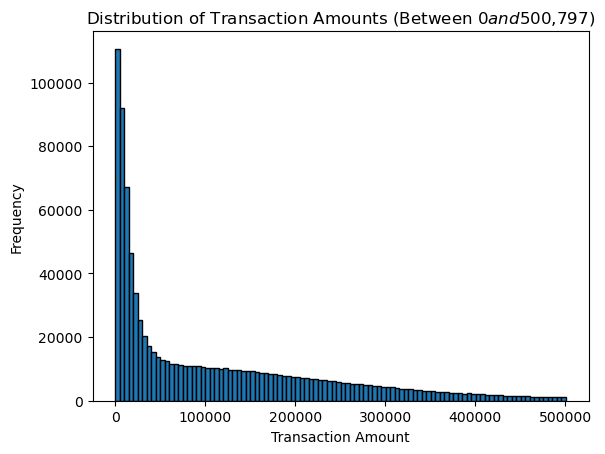

In [65]:
# TODO: Begin your EDA
Q1 = transactions_df['amount'].quantile(0.25)
Q3 = transactions_df['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

df_filtered = transactions_df[(transactions_df['amount'] >= lower_bound) & (transactions_df['amount'] <= upper_bound)]

plt.hist(df_filtered['amount'], bins=100, edgecolor='black')
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title(f"Distribution of Transaction Amounts (Between ${lower_bound:,.0f} and ${upper_bound:,.0f})")
plt.show()


### Q2: Amount vs Old Balance Origin by Fraud Status

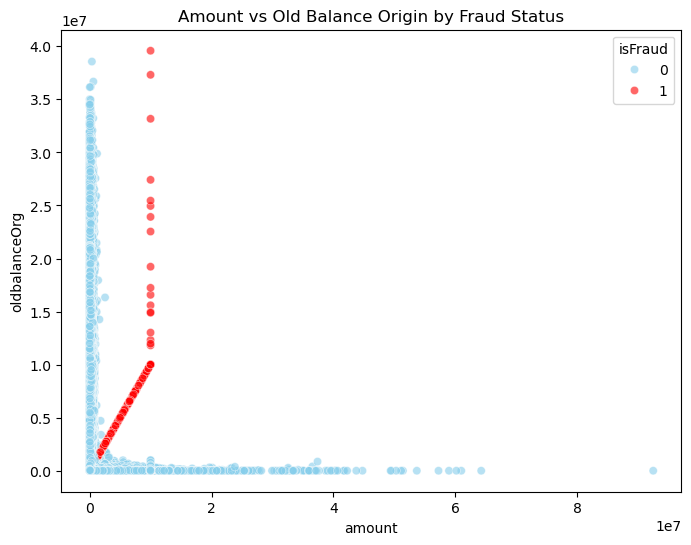

In [66]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=transactions_df, x='amount', y='oldbalanceOrg', hue='isFraud', alpha=0.6, palette={0: 'skyblue', 1: 'red'},)
plt.title('Amount vs Old Balance Origin by Fraud Status')
plt.show()

### Q3

In [ ]:
transactions_df.groupby('type')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
CASH_IN,219955.0,168928.914668,1.267864e+05,0.43,70092.845,142942.990,240085.0800,1609288.13
CASH_OUT,351360.0,175584.659320,1.703743e+05,0.00,72382.815,146209.915,245881.7625,10000000.00
DEBIT,6417.0,5445.890813,1.302416e+04,5.24,1530.240,3099.530,5423.2500,389762.68
PAYMENT,338573.0,13055.592085,1.256291e+04,0.03,4377.100,9481.670,17565.5600,230549.18
TRANSFER,83695.0,911827.155179,1.896175e+06,2.60,217105.800,487883.710,978027.6650,92445516.64


### Q4

In [70]:
transactions_df.groupby(['isFraud', 'type'])['amount'].mean().unstack().fillna(0)

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,168928.914668,1.734277e+05,5445.890813,13055.592085,9.081874e+05
1,0.000000,1.326971e+06,0.000000,0.000000,1.384176e+06


### Q5

In [81]:
pivot = pd.pivot_table(
    transactions_df,
    values='type',            # 选一列不为空的列，做计数用
    index='isFlaggedFraud',
    columns='isFraud',
    aggfunc='count',
    fill_value=0
)

pivot.columns = ['Actual Fraud=0', 'Actual Fraud=1']
pivot.index = ['Flagged Fraud=0', 'Flagged Fraud=1']

print(pivot)

                 Actual Fraud=0  Actual Fraud=1
Flagged Fraud=0          998703            1296
Flagged Fraud=1               0               1


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer: Most transactions occur with amounts below 50,000, indicating that the distribution of transaction amounts is right-skewed. From the histogram of transaction amounts, we can see that lower transaction amounts have higher frequency. As the transaction amount increases, the frequency of transactions decreases significantly. This suggests that the majority of transactions are small to moderate in value, while only a few rare transactions involve large amounts.

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer: Comparing 'amount' and 'oldbalanceOrg', we can observe that there is a linear relationship between 0 to 1 with fuard transaction，we can indicated that as the transaction amount closer to the original account balance，there is highly passible fuard. we alson see that all the fuard transaction with amount no more then 1 as the original account balance increase, which means that most of fuard transactions occur in a relatively small amount.

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

Answer: TRANSFER and CASH_OUT transactions usually involve much larger amounts compared to other types. On the other hand, DEBIT and PAYMENT transactions tend to be smaller, suggesting they’re mostly used for daily spending or routine payments. This indicated that certain types of transactions are typically associated with high-value transfers, while others are more common for smaller, regular expenses.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer: For fraudulent accounts, transactions of types 'CASH_IN', 'DEBIT', and 'PAYMENT' are almost nonexistent, and their amounts are effectively zero. Also, fraudulent transactions involve much larger amounts with in type 'CASH_OUT' and 'TRANSFER', which indicates that fraudsters tend to carry out large withdrawals and transfers. Thus, fraudsters specifically target transaction types where large sums can be illicitly withdrawn or transferred.

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer: The system is really bad at spotting fraud transactions. Out of all the fraud cases, it missed 1,296 and only caught 1 correctly. That means the recall is about 0.077%, which is less than 0.1%. In other words, to avoid false alarms, the system barely flags anything, which seriously hurts its ability to prevent fraud in real life. It definitely needs to improve how sensitive and effective the model is.